In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score

In [23]:
# Load the dataset
file_path = '/content/mcdonalds.csv'  # Update with actual file path
df = pd.read_csv(file_path)

In [24]:
#Display basic dataset information
print("Dataset shape:", df.shape)
print("Column names:", df.columns.tolist())
print("First few rows:\n", df.head())

Dataset shape: (1453, 15)
Column names: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
First few rows:
   yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once

In [25]:
# Convert categorical responses (Yes/No) to binary
binary_cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [26]:
# Convert categorical 'Like' column to numeric scale
like_mapping = {
    'I hate it!-5': -5, '-4': -4, '-3': -3, '-2': -2, '-1': -1, '0': 0,
    '+1': 1, '+2': 2, '+3': 3, '+4': 4, 'I love it!+5': 5
}
df['Like.n'] = df['Like'].map(like_mapping)

In [27]:
# Encode categorical columns (Gender, VisitFrequency)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])

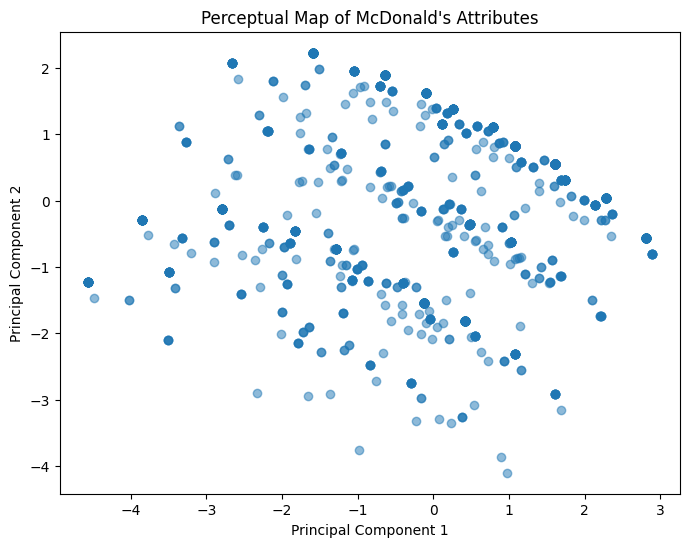

In [28]:
# Principal Component Analysis (PCA) for perceptual mapping
X = df[binary_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Perceptual Map of McDonald's Attributes")
plt.show()

In [29]:
# K-Means Clustering for Market Segmentation
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Segment'] = kmeans.fit_predict(X_scaled)

In [30]:
# Compute silhouette score to evaluate clustering
sil_score = silhouette_score(X_scaled, df['Segment'])
print("Silhouette Score:", sil_score)

Silhouette Score: 0.23353459275799804


In [31]:
# Gaussian Mixture Model for soft clustering
gmm = GaussianMixture(n_components=4, random_state=42)
df['Segment_GMM'] = gmm.fit_predict(X_scaled)

In [32]:
# Selecting Target Segment
segment_counts = df['Segment'].value_counts()
print("Segment Distribution:\n", segment_counts)

Segment Distribution:
 Segment
3    753
1    407
2    171
0    122
Name: count, dtype: int64


In [34]:
# Customizing Marketing Mix
segment_means = df.groupby('Segment').agg({col: 'mean' for col in df.select_dtypes(include=np.number).columns}) # Calculate mean for numeric columns only
print("Segment Attribute Means:\n", segment_means)

Segment Attribute Means:
             yummy  convenient     spicy  fattening    greasy      fast  \
Segment                                                                  
0        0.081967    0.000000  0.065574   0.860656  0.745902  0.639344   
1        0.051597    1.000000  0.076167   0.987715  0.680590  0.886978   
2        0.730994    0.964912  0.122807   0.000000  0.087719  0.929825   
3        0.859230    0.992032  0.100930   1.000000  0.507304  0.942895   

            cheap     tasty  expensive   healthy  disgusting        Age  \
Segment                                                                   
0        0.327869  0.131148   0.655738  0.057377    0.770492  47.950820   
1        0.530713  0.108108   0.410319  0.054054    0.484029  47.936118   
2        0.690058  0.830409   0.210526  0.608187    0.040936  49.783626   
3        0.658699  0.974768   0.314741  0.207171    0.073041  41.086321   

         VisitFrequency    Gender    Like.n  Segment  Segment_GMM  
Segment   

In [35]:
# Linear Regression to analyze perception effects
X_reg = df[binary_cols]
y_reg = df['Like.n']
reg_model = LinearRegression()
reg_model.fit(X_reg, y_reg)
print("Regression Coefficients:", reg_model.coef_)

Regression Coefficients: [ 2.29181324  1.11046775 -0.30145497 -0.39968458 -0.25333262  0.33410647
  0.09186069  1.43718643  0.04912398  0.48474836 -1.89662126]


In [36]:
# Evaluating and Monitoring the Model Performance
r_squared = reg_model.score(X_reg, y_reg)
print("Model R-Squared:", r_squared)

Model R-Squared: 0.623451420320014
